<a href="https://colab.research.google.com/github/pttrupt/EDA-on-Google-play-store-apps-/blob/main/EDA_on_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Play Store Apps Exploratory Data Analysis 

ToDo - talk about EDA 

ToDo - talk about dataset(Source, information)
* Kaggle 
* information about applications 


## Download the Dataset

- Dataset URL: https://www.kaggle.com/gauthamp10/google-playstore-apps  

In [1]:
!pip install opendatasets --upgrade -q

In [3]:
import opendatasets as od 

download_url = 'https://www.kaggle.com/gauthamp10/google-playstore-apps'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pttrupt
Your Kaggle Key: ··········


100%|██████████| 207M/207M [00:01<00:00, 113MB/s]


In [4]:
# file path 
data_file = './google-playstore-apps/Google-Playstore.csv'

## Data Table Display 

- Enables the Interactive Displays to Panadas DataFrame for Sorting, Filtering and Explore Dynamically 


In [86]:
!pip install google.colab -q

In [6]:
from google.colab import data_table

In [7]:
data_table.enable_dataframe_formatter()

## Data Preparation and cleaning 

* Load the file using Pandas 
* Look for information about the data 
* fix incorrect values and any missing values 




In [107]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [108]:
# convert csv file into Pandas DataFrame 
df = pd.read_csv(data_file)

In [109]:
# set options to show all columns of DataFrame 
pd.options.display.max_columns = len(df.columns)

In [110]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [111]:
df.shape

(2312944, 24)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor


* Columns like 
   - App Id
   - Developer Email
   -  Developer Website
   - Privacy policy 
   -  Scraped Time 

  which are not that much useful for our Exploratory Analysis so we'll drop those columns. 

In [113]:
# drop the unnecessary columns
df.drop(columns = ['App Id', 'Developer Email', 'Privacy Policy', 'Developer Website', 'Scraped Time'], inplace=True)

In [114]:
len(df.columns)

19

#### Missing Data

In [115]:
# Calculating percentage of missing data for each column
df.isnull().sum()* 100 / df.shape[0] 

App Name            0.000086
Category            0.000000
Rating              0.989345
Rating Count        0.989345
Installs            0.004626
Minimum Installs    0.004626
Maximum Installs    0.000000
Free                0.000000
Price               0.000000
Currency            0.005837
Size                0.008474
Minimum Android     0.282324
Developer Id        0.001427
Released            3.071972
Last Updated        0.000000
Content Rating      0.000000
Ad Supported        0.000000
In App Purchases    0.000000
Editors Choice      0.000000
dtype: float64

- It is fair to say that not much of data is missing, also if it does then it is around 1% at most other than 'Released' column.
- Since 'Released' column contains date of the released app so we don't have way to fill those value. 
  


##### Missing Data per Category

In [116]:
# Group the data via Category
cat_grp = df.groupby("Category")

In [117]:
nan_by_cat = {}
for each_cat in df["Category"].unique():
  nan_by_cat[each_cat] = cat_grp.get_group("Music").isnull().sum().sum()
  

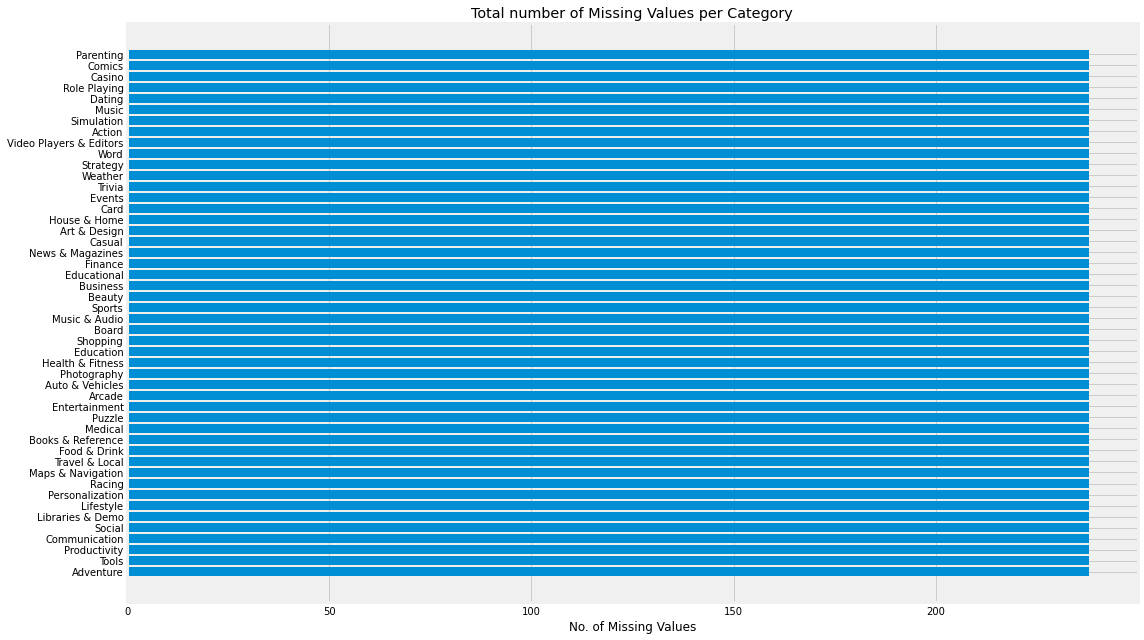

In [118]:
plt.figure(figsize=(16,9))
plt.barh(y = list(nan_by_cat.keys()), width=list(nan_by_cat.values()))
plt.title("Total number of Missing Values per Category")
plt.xlabel("No. of Missing Values")
plt.tight_layout()

- Above bar graph tells us that each category has equal number of missing values init which is interesting.

So here we are going to drop those rows which contains missing values in any columns. Although there are many ways to fill missing values but we are not going to do that here because we don't have that much missing values in our data as compair to original size of dataset. 

In [119]:
# Drop the missing values
df = df.dropna(axis=0)

#### Covert Data type

In [120]:
# convert columns to best dtypes (data-types)
df = df.convert_dtypes() 

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235278 entries, 0 to 2312943
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          string 
 1   Category          string 
 2   Rating            float64
 3   Rating Count      Int64  
 4   Installs          string 
 5   Minimum Installs  Int64  
 6   Maximum Installs  Int64  
 7   Free              boolean
 8   Price             float64
 9   Currency          string 
 10  Size              string 
 11  Minimum Android   string 
 12  Developer Id      string 
 13  Released          string 
 14  Last Updated      string 
 15  Content Rating    string 
 16  Ad Supported      boolean
 17  In App Purchases  boolean
 18  Editors Choice    boolean
dtypes: Int64(3), boolean(4), float64(2), string(10)
memory usage: 296.3 MB


- Columns like 'Released' and 'Last Updated' have dates init but it is of the form of string.

In [122]:
# convert columns like "Released" and "Last Updated" into datetime data type
df["Released"] = pd.to_datetime(df["Released"], format='%b %d, %Y')
df["Last Updated"] = pd.to_datetime(df["Last Updated"], format='%b %d, %Y')

#### Combine similar Category into One Category

In [123]:
# Explore Diffrenet categories into Categories column
df["Category"].unique()


<StringArray>
[              'Adventure',                   'Tools',
            'Productivity',           'Communication',
                  'Social',        'Libraries & Demo',
               'Lifestyle',         'Personalization',
                  'Racing',       'Maps & Navigation',
          'Travel & Local',            'Food & Drink',
       'Books & Reference',                 'Medical',
                  'Puzzle',           'Entertainment',
                  'Arcade',         'Auto & Vehicles',
             'Photography',        'Health & Fitness',
               'Education',                'Shopping',
                   'Board',           'Music & Audio',
                  'Sports',                  'Beauty',
                'Business',             'Educational',
                 'Finance',        'News & Magazines',
                  'Casual',            'Art & Design',
            'House & Home',                    'Card',
                  'Events',                  'Trivi

- By looking closly to each category name, we can find few category name kind of similar such as "Music" as same as "Music & Audio" and "Education" with "Educational". We can combine those individual categories into single category.

In [124]:
# convert the similar Categories into one Category using indices 
music_idx = df[df.Category == "Music"].index
df.loc[music_idx, "Category"] = "Music & Audio"
df.loc[df[df.Category == "Educational"].index, "Category"] = "Education" 

In [125]:
df.describe() # returns stastical table containing 5 number summary statstics of numerical columns

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.235278e+06,2.235278e+06,2.235278e+06,2.235278e+06,2.235278e+06
mean,2.206450e+00,2.759912e+03,1.760302e+05,3.081197e+05,1.047695e-01
std,2.108360e+00,1.987596e+05,1.420403e+07,2.208880e+07,2.660923e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.600000e+01,0.000000e+00
50%,3.000000e+00,6.000000e+00,5.000000e+02,7.060000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.427000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


- Here, we can see some of interesting things like 75% of data has `Rating Count` less than 42 and maximum Rating Count is in $10^8$. Similar situation occur in `Minimum Installs` and `Maximum Installs`.

## Exploratory Analysis and Visualization 

### Top 10 Categories 

> Q. Which top 10 categories have most number apps in dataset?

In [126]:
cat = df['Category'].value_counts(sort=True)*100 / len(df)

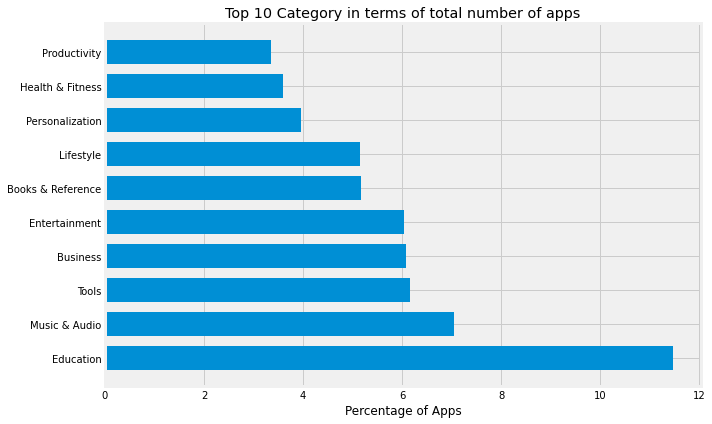

In [127]:
plt.figure(figsize=(10,6))
plt.barh(y = cat.index[:10], width=cat[:10], height=0.7)
plt.title("Top 10 Category in terms of total number of apps")
plt.xlabel("Percentage of Apps")
plt.tight_layout()
# plt.xticks(rotation=25)
plt.show()

### No. Editors Choice Apps per Category 

> Q. Top 10 categories for Editor Choice Apps

In [128]:
editor_choice = df.groupby(by='Category')['Editors Choice'].agg(np.sum)
editor_choice.sort_values(ascending=False, inplace=True)

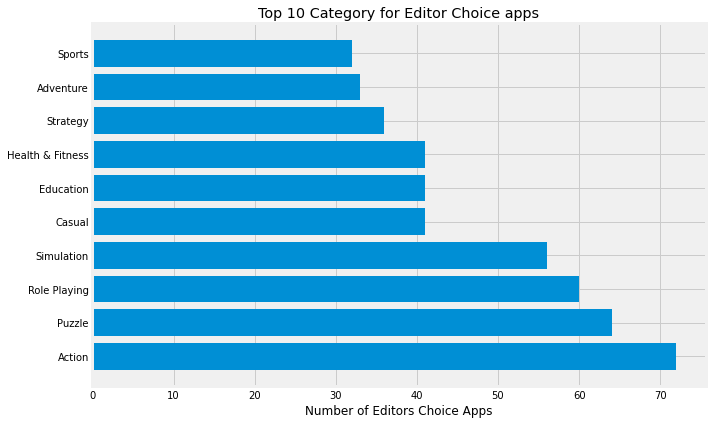

In [129]:
plt.figure(figsize=(10,6))
plt.barh(y=editor_choice.index[:10], width=editor_choice[:10])
plt.title("Top 10 Category for Editor Choice apps")
plt.xlabel("Number of Editors Choice Apps")
plt.tight_layout()
plt.show()

### Installs 

By lookings closly to dataset, we assume that following three columns are highly co-related.
- installls 
- Minimum Installs 
- Maximum Installs 

Checking the corelations between three install columns 

In [132]:
df['Installs'] = df['Installs'].str.rstrip('+')
df['Installs'] = df['Installs'].apply(lambda x:x.replace(',', '')).astype('int')

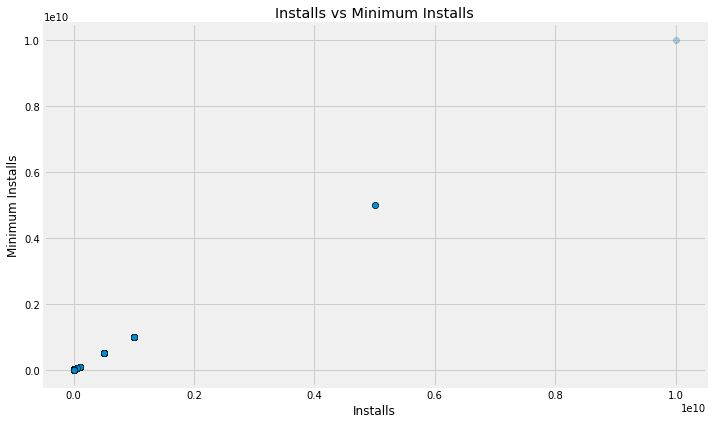

In [135]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Installs'], y=df['Minimum Installs'], alpha=0.3, edgecolors='k')
plt.title("Installs vs Minimum Installs")
plt.xlabel("Installs")
plt.ylabel("Minimum Installs")
plt.tight_layout()
plt.show()

- We can see the strong positive corelation but it is still not that much clear, we can take look at all those values which are less than 2e5.

In [34]:
less_install = df[df['Installs']<2e5]['Installs']
less_mininum = df[df['Minimum Installs']<2e5]['Minimum Installs']

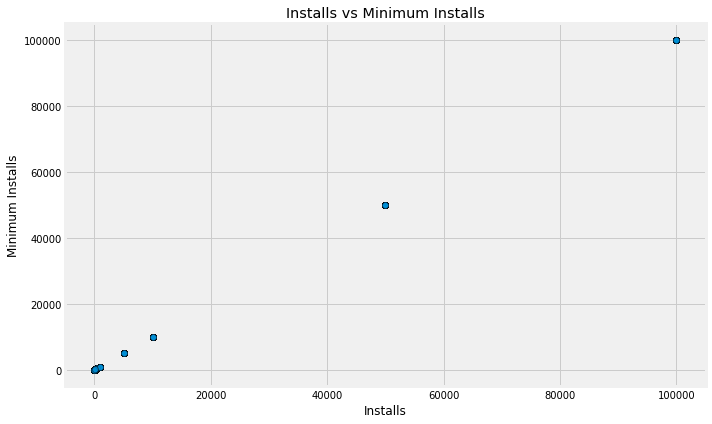

In [136]:
plt.figure(figsize=(10,6))
plt.scatter(x=less_install, y=less_mininum, alpha=0.2, edgecolors='k')
plt.title("Installs vs Minimum Installs")
plt.xlabel("Installs")
plt.ylabel("Minimum Installs")
plt.tight_layout()
plt.show()

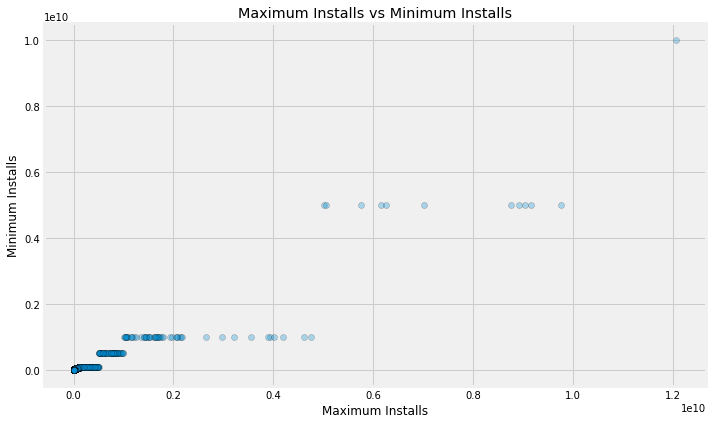

In [137]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Maximum Installs'], y=df['Minimum Installs'], alpha=0.3, edgecolors='k')
plt.title("Maximum Installs vs Minimum Installs")
plt.xlabel("Maximum Installs")
plt.ylabel("Minimum Installs")
plt.tight_layout()
plt.show()

- From these corelation, we can replace install columns with integer mean value of each row of "Minimum Installs" and "Maximum Installs", call it that new column as "Install No."

In [138]:
df['Install No.'] = (df['Minimum Installs'] + df['Maximum Installs'])//2

In [139]:
# drop the "Installs", "Maximum Installs" and "Maximum Installs"
df = df.drop(columns=['Installs', 'Maximum Installs', 'Minimum Installs'])

In [140]:
df.head()

,App Name,Category,Rating,Rating Count,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Install No.
0,Gakondo,Adventure,0.0,0,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,2020-02-26,2020-02-26,Everyone,False,False,False,12
1,Ampere Battery Info,Tools,4.4,64,True,0.0,USD,2.9M,5.0 and up,Webserveis,2020-05-21,2021-05-06,Everyone,True,False,False,6331
2,Vibook,Productivity,0.0,0,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,2019-08-09,2019-08-19,Everyone,False,False,False,54
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,2018-09-10,2018-10-13,Everyone,True,False,False,14
4,GROW.me,Tools,0.0,0,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,2020-02-21,2018-11-12,Everyone,False,False,False,289


### Paid & Free Apps 

> Q. How many free/paid apps are there in dataset?

In [40]:
Free_apps= df['Free'].value_counts()
Free_apps

True     2191361
False      43917
Name: Free, dtype: Int64

In [41]:
free_percent = Free_apps * 100 / len(df)
free_percent

True     98.035278
False     1.964722
Name: Free, dtype: float64

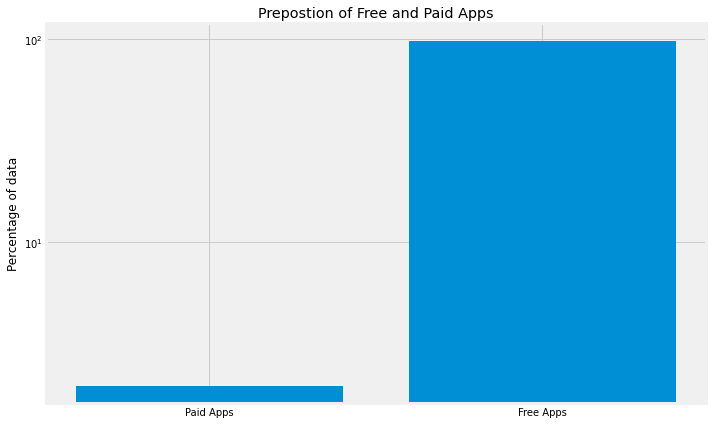

In [42]:
plt.figure(figsize=(10,6))
plt.bar(x=free_percent.index, height=free_percent)
plt.title("Prepostion of Free and Paid Apps")
plt.xticks(ticks=[0,1], labels=["Paid Apps", "Free Apps"])
plt.ylabel('Percentage of data')
plt.yscale('log')
plt.tight_layout()
plt.show()

### Rating

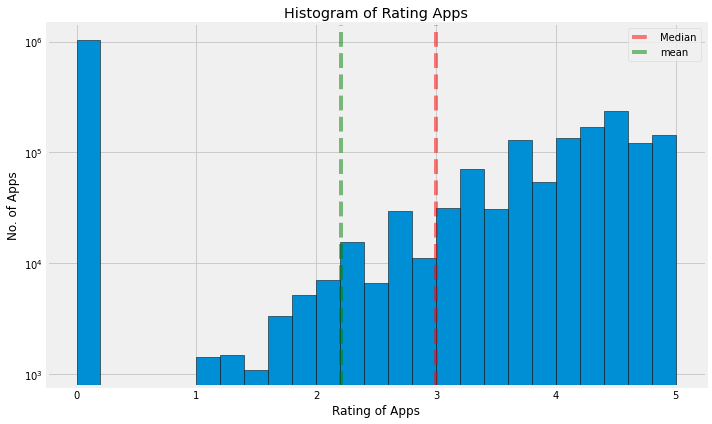

In [44]:
plt.figure(figsize=(10,6))
plt.hist(df['Rating'], bins=25, edgecolor='k')
plt.axvline(np.median(df['Rating']), linestyle='--', color='r', label='Median', alpha=0.5)
plt.axvline(np.mean(df['Rating']), linestyle='--',color='g', label='mean', alpha=0.5)
plt.title("Histogram of Rating Apps")
plt.yscale('log')
plt.xlabel('Rating of Apps')
plt.ylabel('No. of Apps')
plt.tight_layout()
plt.legend()

- Around $10^6$ number of apps in dataset contains 0 rating, otherthan that distribution of rating over the apps is left skewed.

### Mean Ratings and Rating Counts

In [142]:
df_mean = df.groupby("Category")[["Rating", "Rating Count"]].agg(np.mean)

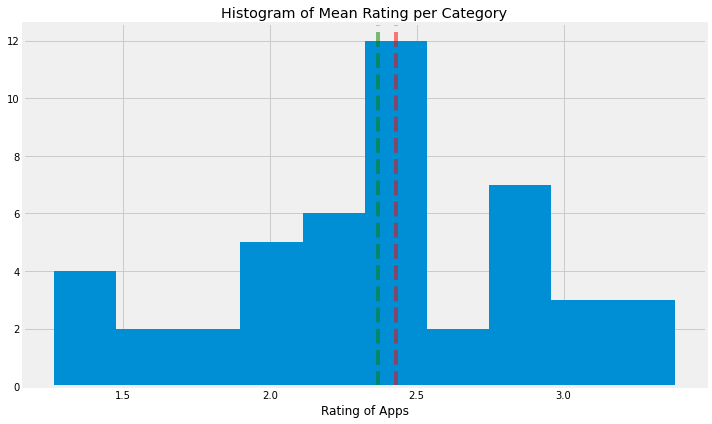

In [143]:
plt.figure(figsize=(10,6))
plt.hist(df_mean['Rating'])
plt.title("Histogram of Mean Rating per Category")
plt.xlabel("Rating of Apps")
plt.axvline(np.median(df_mean['Rating']), linestyle='--', color='r', label='Median', alpha=0.5)
plt.axvline(np.mean(df_mean['Rating']), linestyle='--',color='g', label='mean', alpha=0.5)
plt.tight_layout()
plt.show()

- Mean distribution of rating per category is very close to be a normal. (as Central limit theorem)

In [144]:
rating_by_cat = df_mean['Rating'].sort_values(ascending=False)

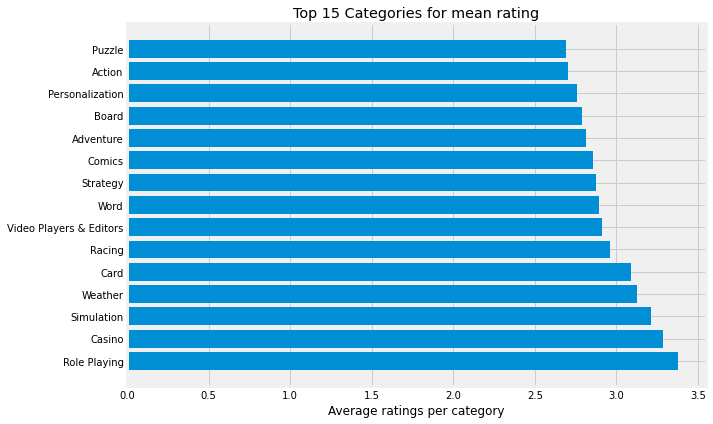

In [145]:
plt.figure(figsize=(10,6))
plt.barh(y=rating_by_cat[:15].index, width=rating_by_cat[:15])
plt.title("Top 15 Categories for mean rating")
plt.xlabel("Average ratings per category")
plt.tight_layout()
plt.show()

### Rating Count

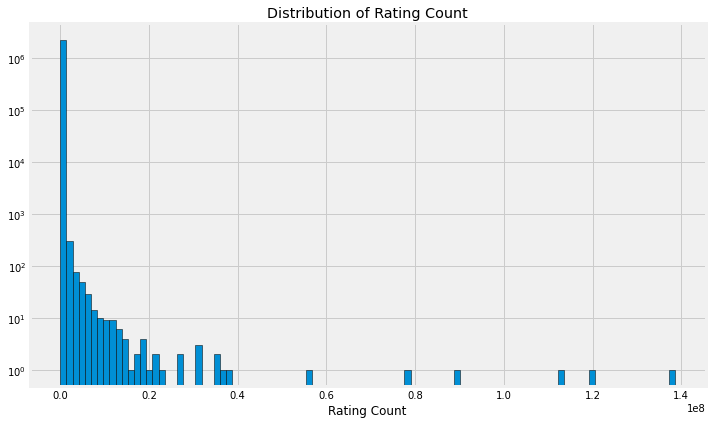

In [146]:
plt.figure(figsize=(10,6))
plt.hist(df["Rating Count"], bins=100, edgecolor='k')
plt.title('Distribution of Rating Count')
plt.yscale('log')
plt.xlabel('Rating Count')
plt.tight_layout()
plt.show()

- Distribution of Rating count is right skewed, it can be seen that the most of the apps rating count are below the 40 rating count. 
- We can also conform that by looking the 5 number summary of "Rating Count" column.

In [147]:
df['Rating Count'].describe()

count    2.235278e+06
mean     2.759912e+03
std      1.987596e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+00
75%      4.200000e+01
max      1.385576e+08
Name: Rating Count, dtype: float64

In [148]:
# calculate the percentage of apps which rating count < 60
less_rating_count = df[df["Rating Count"] < 60]["Rating Count"]
len(less_rating_count)* 100/ len(df)

78.34224646777716

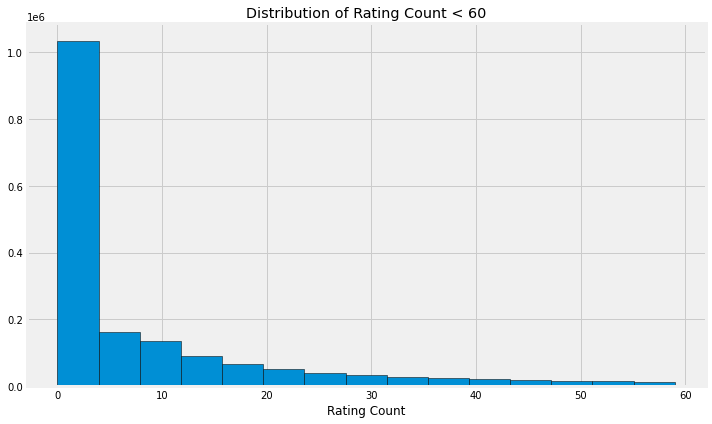

In [149]:
plt.figure(figsize=(10,6))
plt.hist(less_rating_count, bins=15, edgecolor='k')
# plt.axvline(np.median(df['Rating Count']), linestyle='--', color='r', label='Median', alpha=0.5)
# plt.axvline(np.mean(df['Rating Count']), linestyle='--',color='g', label='mean', alpha=0.5)
plt.title('Distribution of Rating Count < 60')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Rating Count')
plt.tight_layout()
plt.show()

In [150]:
# Percentage of apps which rating count > 1 million
more_than_million = df[df["Rating Count"] > 1e6 ]
len(more_than_million) * 100 / len(df)

0.0351634114414404

In [151]:
rating_count_by_cat_mm = more_than_million.groupby("Category")["Rating Count"].agg('count')

In [152]:
sort_rating_count_mm = rating_count_by_cat_mm.sort_values(ascending=False)

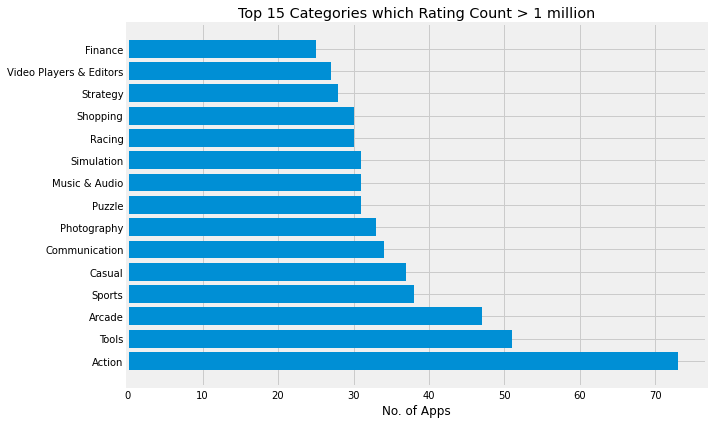

In [153]:
plt.figure(figsize=(10,6))
plt.barh(y=sort_rating_count_mm[:15].index, width=sort_rating_count_mm[:15])
plt.title("Top 15 Categories which Rating Count > 1 million")
plt.xlabel("No. of Apps")
plt.tight_layout()
plt.show()

- `Action` category contains highest number of apps (>70) in dataset which has more than million Rating Count. 

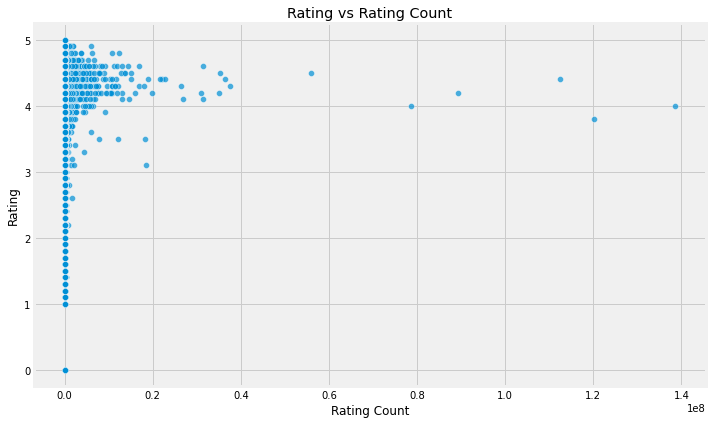

In [154]:
plt.figure(figsize=(10,6))
sns.scatterplot(y =df["Rating"], x =df["Rating Count"], alpha=0.7)
plt.title("Rating vs Rating Count")
plt.tight_layout()

### Year


In [156]:
yearly_released = df["Released"].dt.year.value_counts() 

In [157]:
yearly_updates = df["Last Updated"].dt.year.value_counts() 

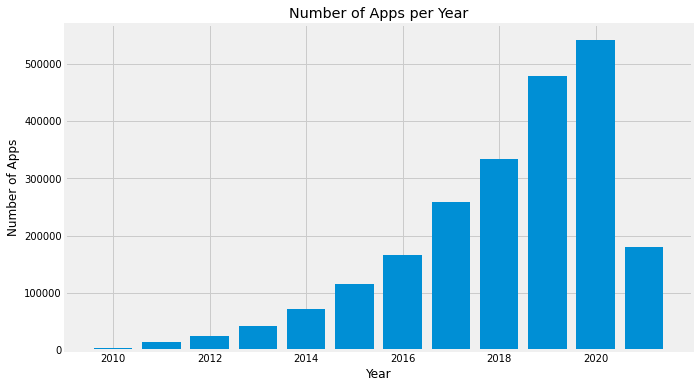

In [158]:
plt.figure(figsize=(10,6))
# width = 0.25
plt.bar(yearly_released.index, yearly_released, Label="Released Apps")
# plt.bar(yearly_updates.index + width, yearly_updates, width= 0.5,  Label="Last Updated Apps")
plt.title("Number of Apps per Year")
plt.xlabel("Year")
plt.ylabel("Number of Apps")
# plt.tight_layout()
plt.show()


- As we can see in the above plot that over the years, number apps has increased more rapidly.
- It is also notable from the plot that dataset does not contains full information of year 2021.

#### Year - 2020 and 2019

In [159]:
# Group data by year 
yearly_data =  df.groupby(df["Released"].dt.year)
year_2020 = yearly_data.get_group(2020)
year_2019 = yearly_data.get_group(2019)

In [160]:
# Percentage of 2020's data and it's total number
print(year_2020.shape[0]*100 / len(df))
print(year_2020.shape[0])

24.261590728312093
542314


In [161]:
cat_2020 = year_2020.Category.value_counts()
cat_2019 = year_2019.Category.value_counts()

(63320.0, 0.0)

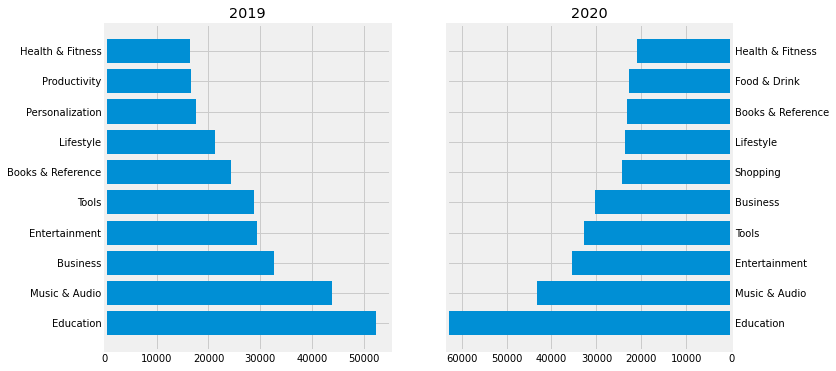

<Figure size 720x432 with 0 Axes>

In [162]:
fig, axes = plt.subplots(1,2, figsize=(10,6))
plt.figure(figsize=(10,6))
axes[0].barh(y=cat_2019.index[:10], width=cat_2019[:10])
axes[0].set_title("2019")
axes[1].barh(y=cat_2020.index[:10], width=cat_2020[:10])
axes[1].set_title("2020")
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_xlim(max(cat_2020[:10]), 0)


- We can see that `Education` and `Music & Audio` categories are leading in both year.
- However year 2020 has more `Entertainment` apps than `Business`where in 2019, `Business` apps were more compair to `Entertainment`.


In [178]:
cat2020_installs = year_2020.groupby('Category')['Install No.'].agg(np.sum).sort_values(ascending=False)
cat2019_installs = year_2019.groupby('Category')['Install No.'].agg(np.sum).sort_values(ascending=False)

(2966193448.0, 0.0)

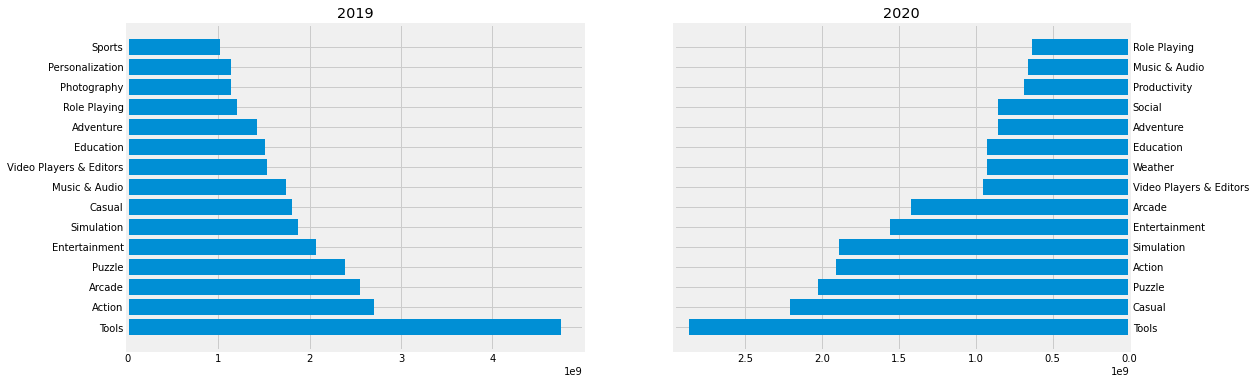

In [195]:
fig, axes = plt.subplots(1,2,figsize=(16,6))
axes[0].barh(cat2019_installs.index[:15],  cat2019_installs[:15])
axes[0].set_title("2019")
axes[1].barh(cat2020_installs.index[:15],  cat2020_installs[:15])
axes[1].set_title("2020")
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_xlim(max(cat2020_installs)+1e8, 0)
# plt.xscale('log')

## Summary and Conclusion